# Dataset

478
240


C:\Users\Isaac\AppData\Local\Temp\ipykernel_19840\2886438993.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column_name].replace(np.NaN, mean, inplace=True)


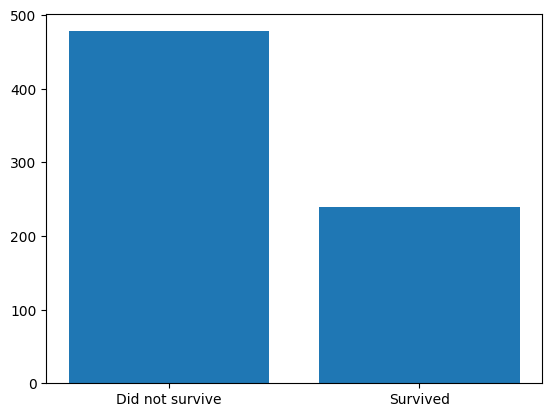

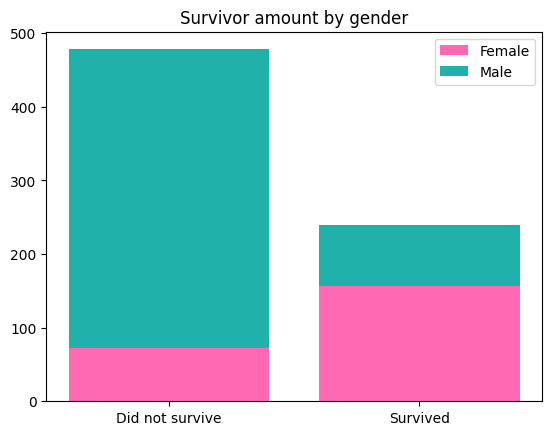

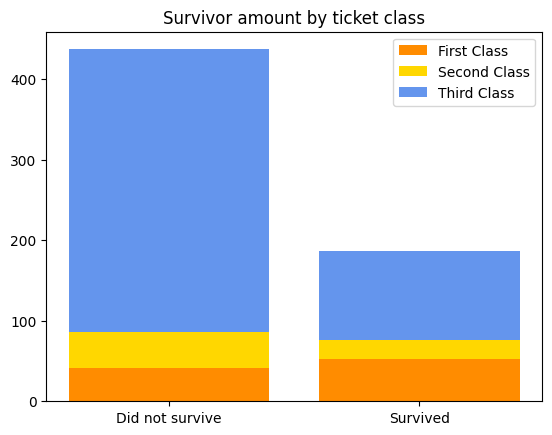

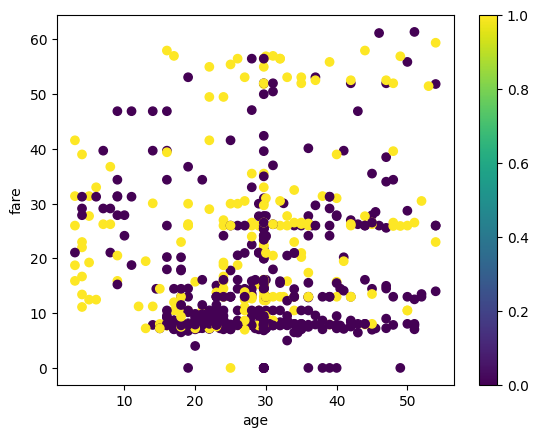

training set data proportion:  1.9895833333333333
testing set data proportion:  2.0


In [2]:
## Imports
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score,  roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## Data loading
dataframe = pandas.read_csv("data/titanic.csv")
## Data analysis
### One-hot encoding 
# One-hot encoding categorical data for 'Pclass' and 'Sex' columns
dataframe = pandas.get_dummies(dataframe, columns=['Pclass', 'Sex','Embarked'], dtype=int)
### Dropping columns
# Drop unnecessary columns
dataframe.drop(['Cabin','PassengerId','Name','Ticket'], axis='columns', inplace=True)
### Outliers and invalid values
def interquartile_range(variable, dataframe):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    return (Q1, Q3, Q3 - Q1)


def remove_outliers(dataframe: pandas.DataFrame, dataframe_columns):
    threshold = 1.5

    for i in range(len(dataframe_columns)):
        (Q1, Q3, IQR) = interquartile_range(dataframe_columns[i], dataframe)
        low_outliers = dataframe[dataframe[dataframe_columns[i]] < Q1 - threshold * IQR]
        dataframe = dataframe.drop(low_outliers.index)
        high_outliers = dataframe[dataframe[dataframe_columns[i]] > Q3 + threshold * IQR]
        dataframe = dataframe.drop(high_outliers.index)
    return dataframe

def remove_nan_from_column(dataframe, column_name):
    mean = dataframe[column_name].mean()
    dataframe[column_name].replace(np.NaN, mean, inplace=True) 

remove_nan_from_column(dataframe, 'Age')
dataframe = remove_outliers(dataframe, ['Age', 'Fare']) # drop outliers
### Balance evaluation
negative = dataframe.Survived.value_counts()[0]
positive = dataframe.Survived.value_counts()[1]

print(negative)
print(positive)

x = np.array(["Did not survive", "Survived"])
y = np.array([negative,positive])
plt.bar(x,y)
plt.show()
### Pairwise correlation
#### Kendall
dataframe.corr(method='kendall', numeric_only=False)
#### Pearson
dataframe.corr(method='pearson', min_periods=1, numeric_only=False)
#### Spearman
dataframe.corr(method='spearman', min_periods=1, numeric_only=False)
# Data Visualization
outcome = dataframe.Survived
fare = dataframe.Fare
age = dataframe.Age
parch = dataframe.Parch

female_survivors = len(dataframe.query("Sex_female==1 and Survived==1"))
female_deaths = len(dataframe.query("Sex_female==1 and Survived==0"))
all_females = dataframe.Sex_female.value_counts()[1]

male_survivors = len(dataframe.query("Sex_female==0 and Survived==1"))
male_deaths = len(dataframe.query("Sex_female==0 and Survived==0"))
all_males = dataframe.Sex_female.value_counts()[0]

# Class 1 Tickets
c1_survivors = len(dataframe.query("Pclass_1==1 and Survived==1"))
c1_deaths = len(dataframe.query("Pclass_1==1 and Survived==0"))

# Class 2 Tickets
c2_survivors = len(dataframe.query("Pclass_2==1 and Survived==1"))
c2_deaths = len(dataframe.query("Pclass_2==1 and Survived==0"))

# Class 3 Tickets
c3_survivors = len(dataframe.query("Pclass_3==1 and Survived==1"))
c3_deaths = len(dataframe.query("Pclass_3==1 and Survived==0"))

# Bar Plots
x = np.array(["Did not survive", "Survived"])
y_female = np.array([female_deaths,female_survivors])
y_male = np.array([male_deaths,male_survivors])
p1 = plt.bar(x, y_female, color='hotpink')
p2 = plt.bar(x, y_male, bottom=y_female, color='lightseagreen')
plt.title('Survivor amount by gender')
plt.legend((p1[0], p2[0]), ('Female', 'Male'))
plt.show()

y_class_1 = np.array([c1_deaths,c1_survivors])
y_class_2 = np.array([c2_deaths,c2_survivors])
y_class_3 = np.array([c3_deaths,c3_survivors])
p3 = plt.bar(x, y_class_1, color='darkorange')
p4 = plt.bar(x, y_class_2, bottom=y_class_1, color ='gold')
p5 = plt.bar(x, y_class_3, bottom=y_class_2,color='cornflowerblue')
plt.title('Survivor amount by ticket class')
plt.legend((p3[0], p4[0], p5[0]), ('First Class', 'Second Class', 'Third Class'))
plt.show()

# Scatter plot
scatter_plot2 = plt.scatter(age, fare, c=outcome)
plt.colorbar(scatter_plot2)
plt.xlabel("age")
plt.ylabel("fare")
plt.show()

## Dataset splitting
X, y = dataframe[["Age", "SibSp", "Parch", "Fare", "Pclass_1", "Pclass_2", "Pclass_3", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]], dataframe["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=outcome)
print("training set data proportion: ",y_train.value_counts()[0]/y_train.value_counts()[1])
print("testing set data proportion: ",y_test.value_counts()[0]/y_test.value_counts()[1])





# Regresión Logística

Parameters: {'C': 0.01, 'solver': 'liblinear'}
Mean Accuracy: 0.7787032799389779
Accuracy: 0.7777777777777778
Precision: 0.7
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        96
           1       0.70      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.75      0.73      0.74       144
weighted avg       0.77      0.78      0.77       144

ROC AUC Score: 0.7291666666666667
Confusion Matrix:
[[84 12]
 [20 28]]


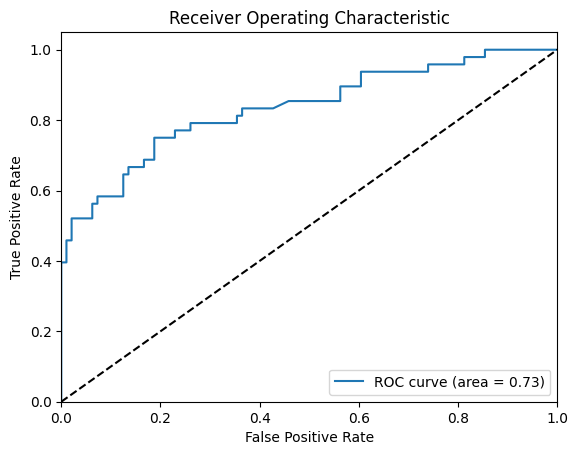

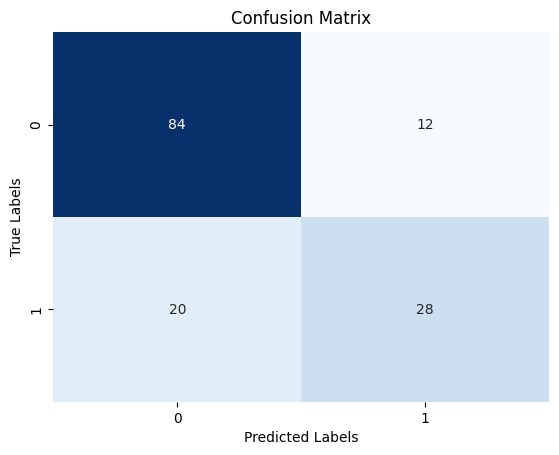

Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Mean Accuracy: 0.804881769641495
Accuracy: 0.8125
Precision: 0.8
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        96
           1       0.80      0.58      0.67        48

    accuracy                           0.81       144
   macro avg       0.81      0.76      0.77       144
weighted avg       0.81      0.81      0.80       144

ROC AUC Score: 0.7552083333333335
Confusion Matrix:
[[89  7]
 [20 28]]


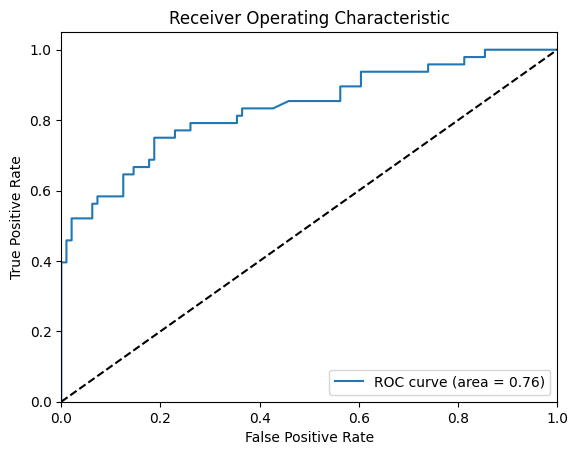

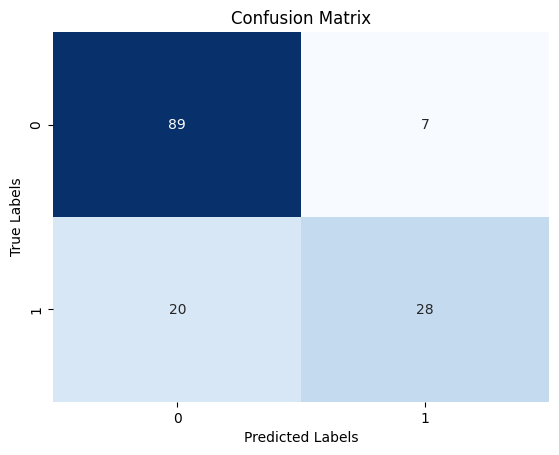

Parameters: {'C': 0.01, 'solver': 'sag'}
Mean Accuracy: 0.804881769641495
Accuracy: 0.8125
Precision: 0.8
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        96
           1       0.80      0.58      0.67        48

    accuracy                           0.81       144
   macro avg       0.81      0.76      0.77       144
weighted avg       0.81      0.81      0.80       144

ROC AUC Score: 0.7552083333333335
Confusion Matrix:
[[89  7]
 [20 28]]


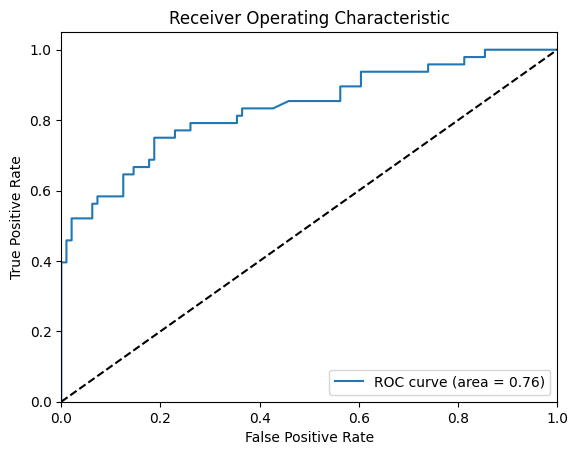

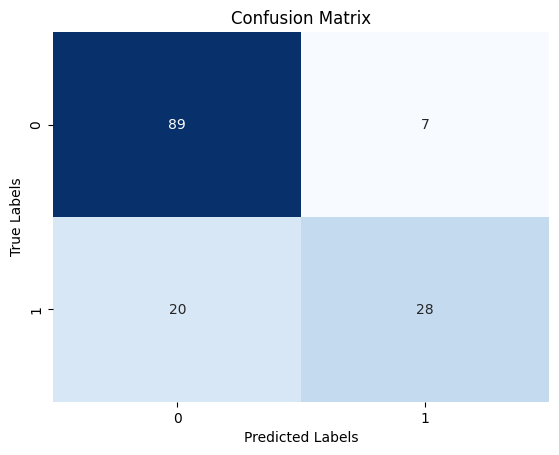

Parameters: {'C': 0.01, 'solver': 'newton-cg'}
Mean Accuracy: 0.804881769641495
Accuracy: 0.8125
Precision: 0.8
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        96
           1       0.80      0.58      0.67        48

    accuracy                           0.81       144
   macro avg       0.81      0.76      0.77       144
weighted avg       0.81      0.81      0.80       144

ROC AUC Score: 0.7552083333333335
Confusion Matrix:
[[89  7]
 [20 28]]


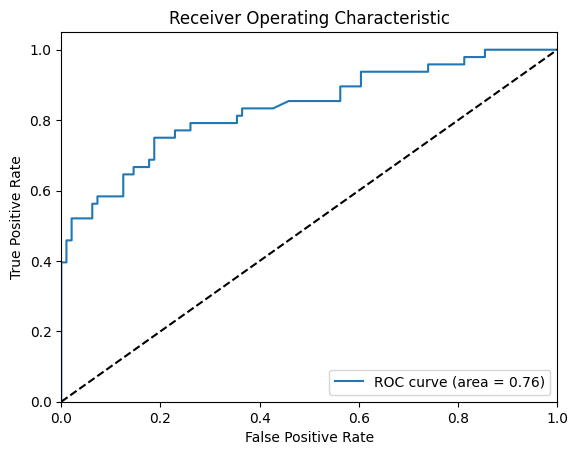

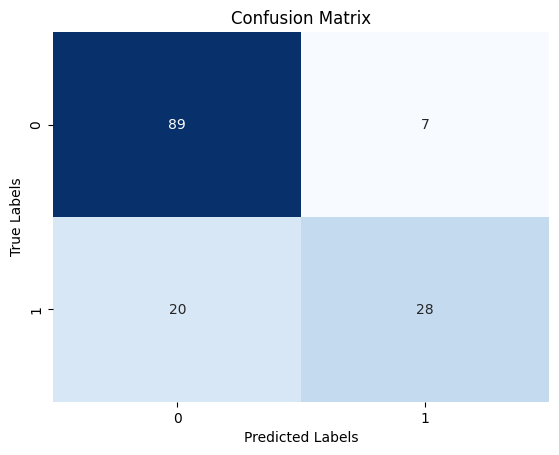

Parameters: {'C': 0.1, 'solver': 'liblinear'}
Mean Accuracy: 0.8048970251716246
Accuracy: 0.7777777777777778
Precision: 0.7
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        96
           1       0.70      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.75      0.73      0.74       144
weighted avg       0.77      0.78      0.77       144

ROC AUC Score: 0.7291666666666667
Confusion Matrix:
[[84 12]
 [20 28]]


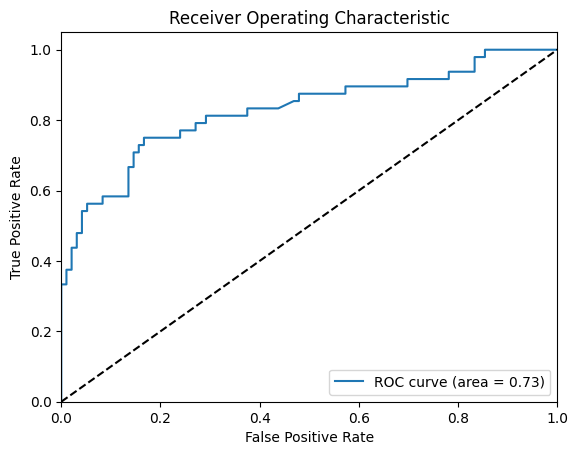

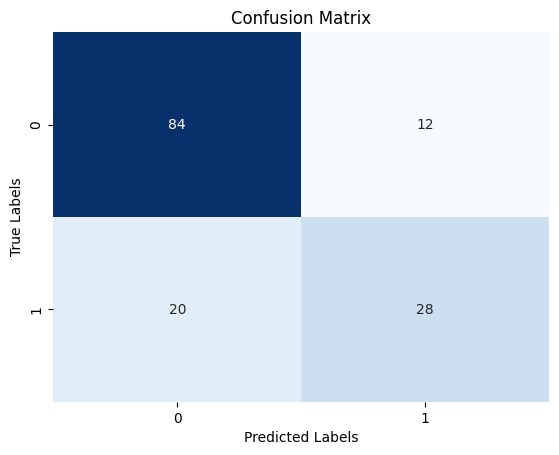

Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Mean Accuracy: 0.8118230358504958
Accuracy: 0.7847222222222222
Precision: 0.717948717948718
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144

ROC AUC Score: 0.734375
Confusion Matrix:
[[85 11]
 [20 28]]


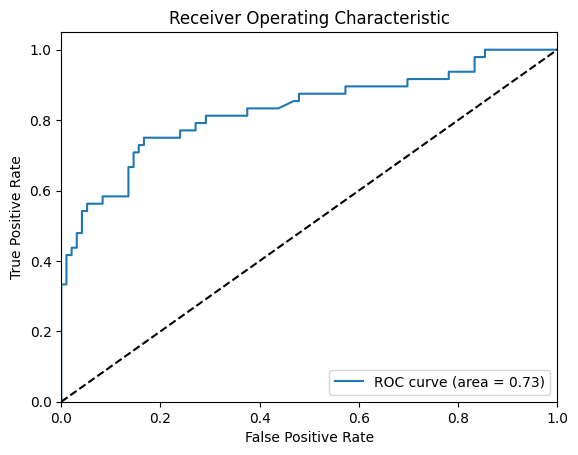

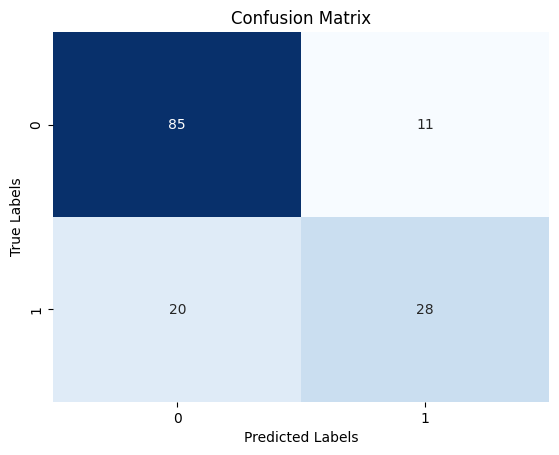

Parameters: {'C': 0.1, 'solver': 'sag'}
Mean Accuracy: 0.8118230358504958
Accuracy: 0.7847222222222222
Precision: 0.717948717948718
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144

ROC AUC Score: 0.734375
Confusion Matrix:
[[85 11]
 [20 28]]


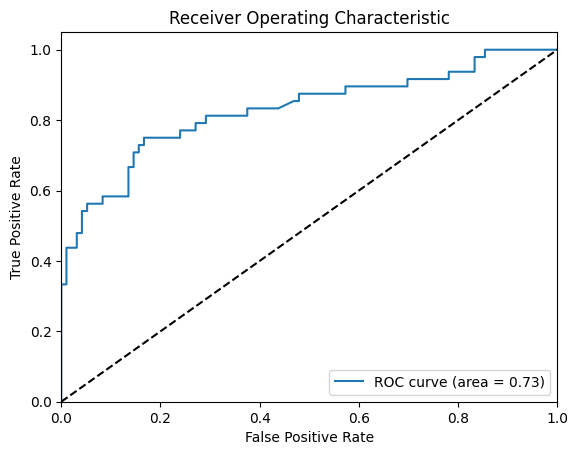

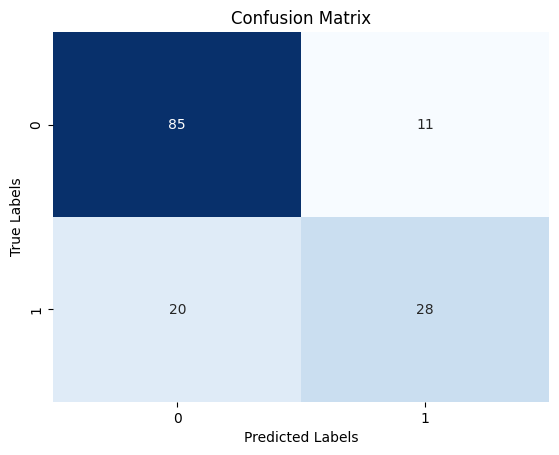

Parameters: {'C': 0.1, 'solver': 'newton-cg'}
Mean Accuracy: 0.8118230358504958
Accuracy: 0.7847222222222222
Precision: 0.717948717948718
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144

ROC AUC Score: 0.734375
Confusion Matrix:
[[85 11]
 [20 28]]


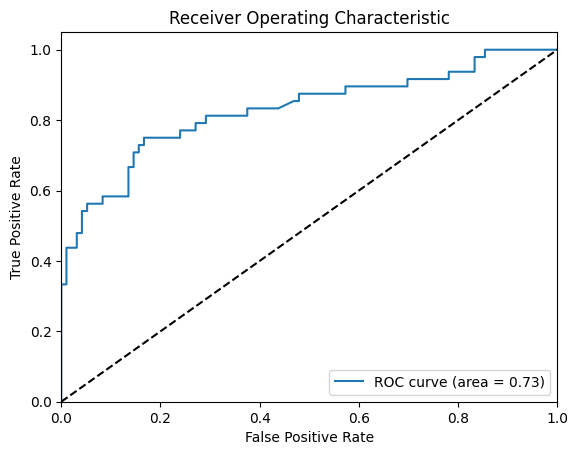

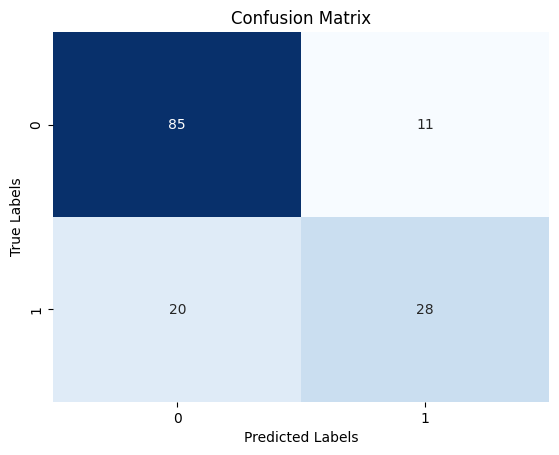

Parameters: {'C': 1, 'solver': 'liblinear'}
Mean Accuracy: 0.7996643783371471
Accuracy: 0.7847222222222222
Precision: 0.717948717948718
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144

ROC AUC Score: 0.734375
Confusion Matrix:
[[85 11]
 [20 28]]


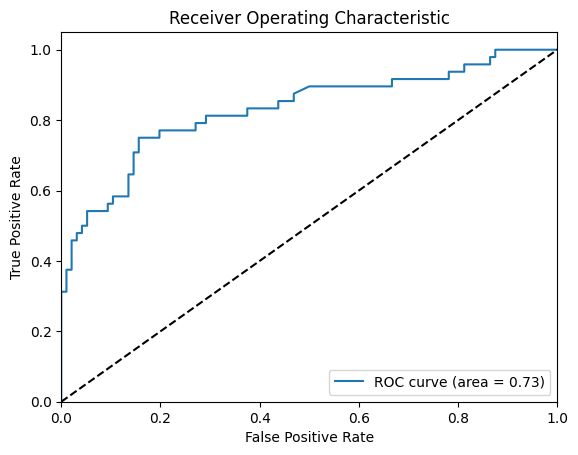

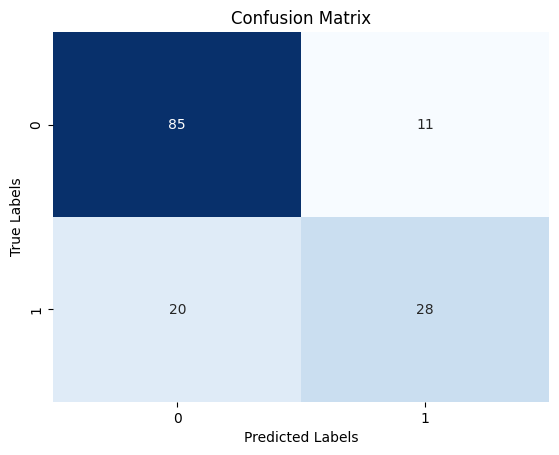

Parameters: {'C': 1, 'solver': 'lbfgs'}
Mean Accuracy: 0.8031426392067125
Accuracy: 0.7847222222222222
Precision: 0.717948717948718
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144

ROC AUC Score: 0.734375
Confusion Matrix:
[[85 11]
 [20 28]]


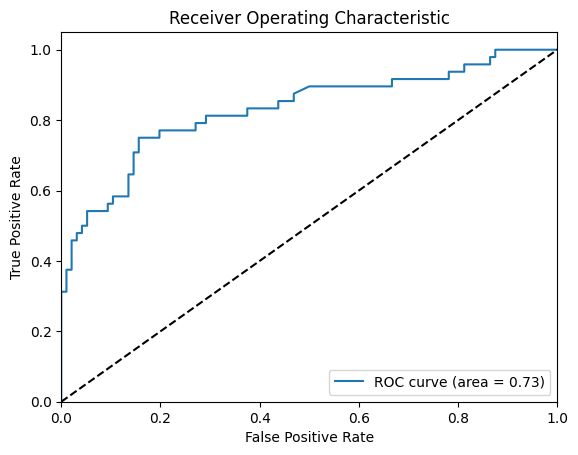

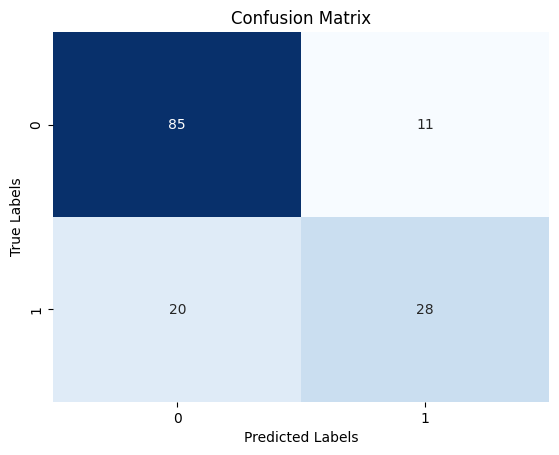

Parameters: {'C': 1, 'solver': 'sag'}
Mean Accuracy: 0.8031426392067125
Accuracy: 0.7847222222222222
Precision: 0.717948717948718
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144

ROC AUC Score: 0.734375
Confusion Matrix:
[[85 11]
 [20 28]]


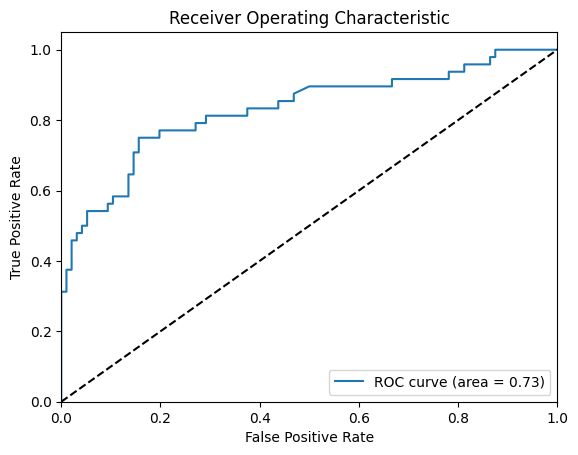

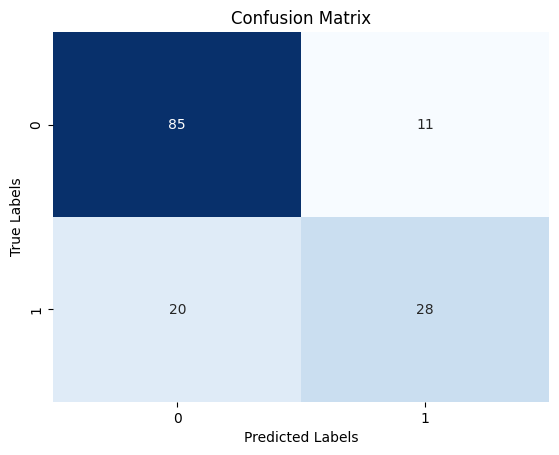

Parameters: {'C': 1, 'solver': 'newton-cg'}
Mean Accuracy: 0.8031426392067125
Accuracy: 0.7847222222222222
Precision: 0.717948717948718
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144

ROC AUC Score: 0.734375
Confusion Matrix:
[[85 11]
 [20 28]]


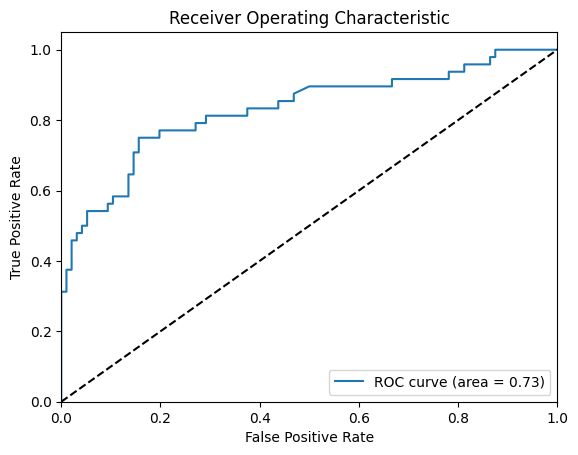

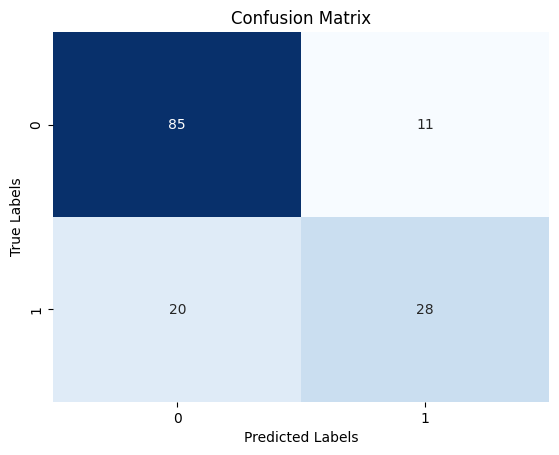

Parameters: {'C': 10, 'solver': 'liblinear'}
Mean Accuracy: 0.8014187643020595
Accuracy: 0.7847222222222222
Precision: 0.717948717948718
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144

ROC AUC Score: 0.734375
Confusion Matrix:
[[85 11]
 [20 28]]


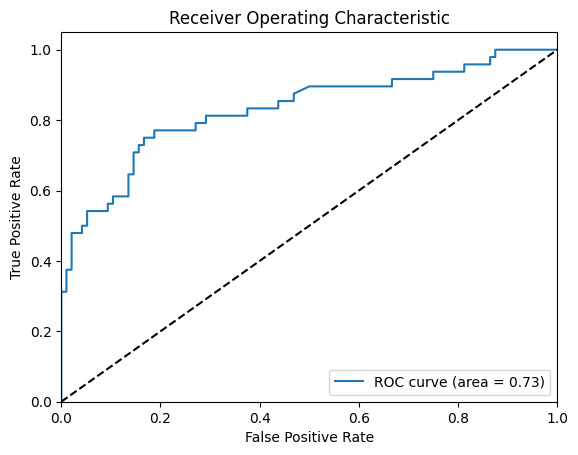

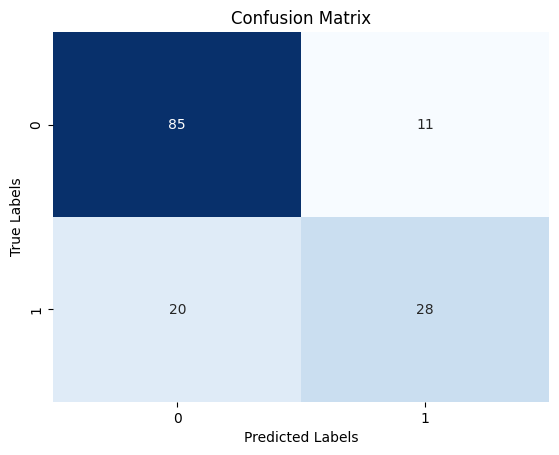

Parameters: {'C': 10, 'solver': 'lbfgs'}
Mean Accuracy: 0.8031578947368422
Accuracy: 0.7847222222222222
Precision: 0.717948717948718
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144

ROC AUC Score: 0.734375
Confusion Matrix:
[[85 11]
 [20 28]]


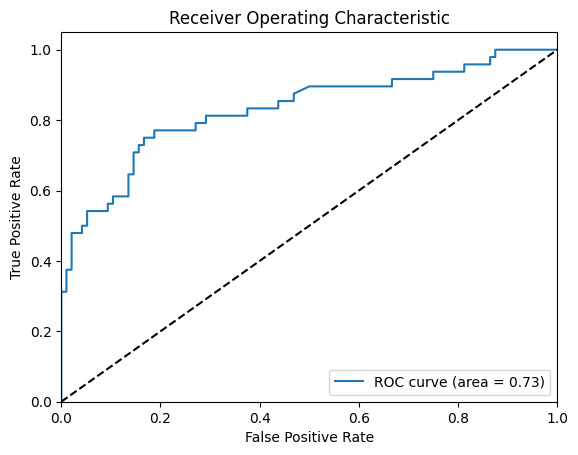

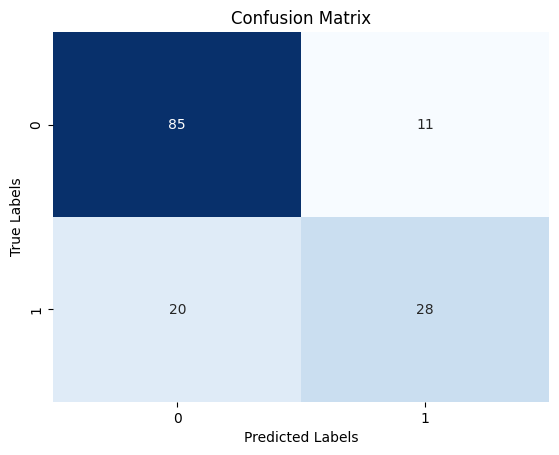

Parameters: {'C': 10, 'solver': 'sag'}
Mean Accuracy: 0.8031578947368422
Accuracy: 0.7847222222222222
Precision: 0.717948717948718
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144

ROC AUC Score: 0.734375
Confusion Matrix:
[[85 11]
 [20 28]]


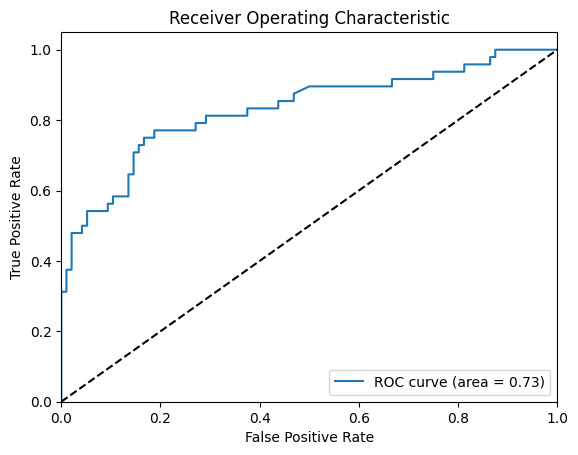

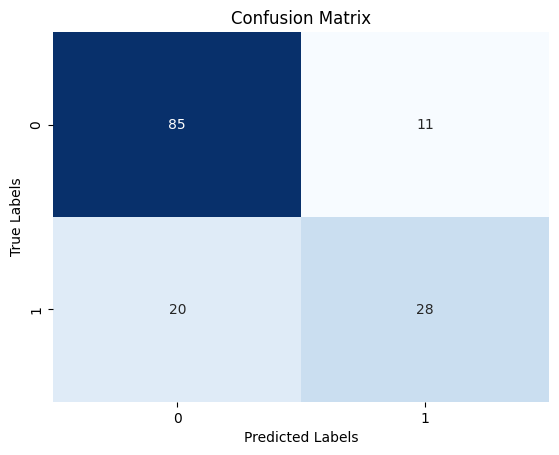

Parameters: {'C': 10, 'solver': 'newton-cg'}
Mean Accuracy: 0.8031578947368422
Accuracy: 0.7847222222222222
Precision: 0.717948717948718
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144

ROC AUC Score: 0.734375
Confusion Matrix:
[[85 11]
 [20 28]]


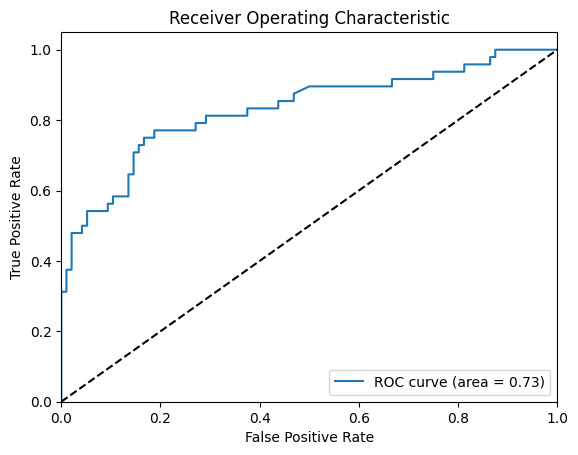

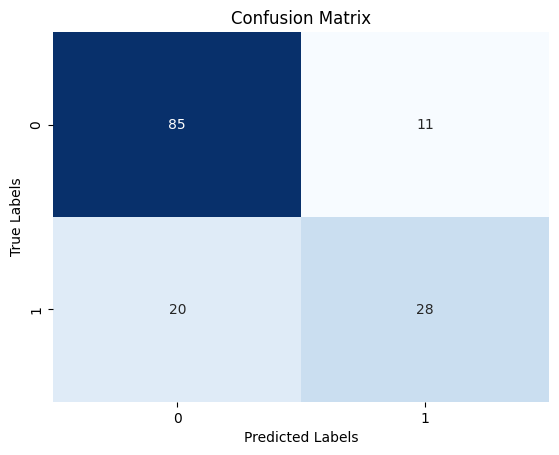

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Accuracy: 0.8118230358504958
Best Model Accuracy: 0.7847222222222222
Best Model Precision: 0.717948717948718
Best Model Recall: 0.5833333333333334
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.72      0.58      0.64        48

    accuracy                           0.78       144
   macro avg       0.76      0.73      0.74       144
weighted avg       0.78      0.78      0.78       144



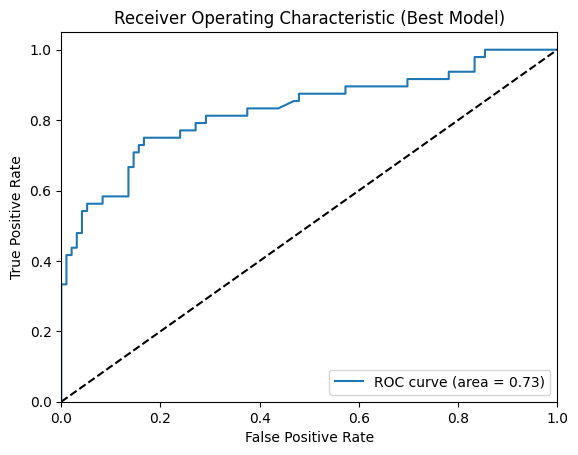

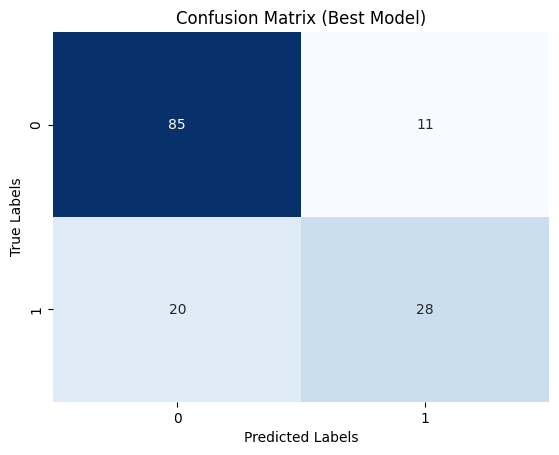

In [3]:
## Logistic Regression
# Standardize features
scaler = StandardScaler()

# Scale the training and testing features usign the same scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg']
}

# Initialize GridSearchCV with LogisticRegression estimator
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, cv=5, scoring='accuracy')

# Print results of all parameter combinations
results = grid_search.fit(X_train_scaled, y_train).cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print("Parameters:", params)
    print("Mean Accuracy:", mean_score)
    # Train model with current parameters
    current_model = LogisticRegression(**params, max_iter=1000)
    current_model.fit(X_train_scaled, y_train)
    # Predictions
    y_pred = current_model.predict(X_test_scaled)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, current_model.predict_proba(X_test_scaled)[:,1])
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Print metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("=" * 50)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot heatmap for confusion matrix
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Get the best estimator
best_model = grid_search.best_estimator_

# Print best parameters and metrics
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
print("Best Model Accuracy:", accuracy_score(y_test, best_model.predict(X_test_scaled)))
print("Best Model Precision:", precision_score(y_test, best_model.predict(X_test_scaled)))
print("Best Model Recall:", recall_score(y_test, best_model.predict(X_test_scaled)))
print("Best Model Classification Report:")
print(classification_report(y_test, best_model.predict(X_test_scaled)))

# ROC curve for the best model
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:,1])
roc_auc = roc_auc_score(y_test, best_model.predict(X_test_scaled))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Best Model)')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix for the best model
best_model_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_scaled))

# Plot heatmap for the best model confusion matrix
plt.figure()
sns.heatmap(best_model_conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# K Nearest Neighbors

K Nearest Neighbors
Unscaled Features
K=3
Accuracy for k=3: 0.7291666666666666
Precision for k=3: 0.6097560975609756
Recall for k=3: 0.5208333333333334
F1 Score for k=3: 0.5617977528089888
Confusion Matrix for k=3:
[[80 16]
 [23 25]]




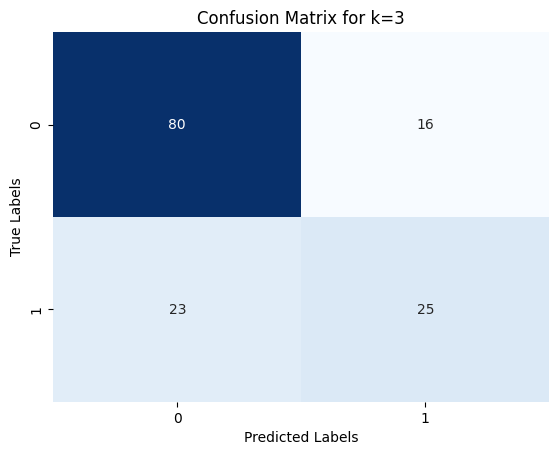

K=5
Accuracy for k=5: 0.7361111111111112
Precision for k=5: 0.6388888888888888
Recall for k=5: 0.4791666666666667
F1 Score for k=5: 0.5476190476190476
Confusion Matrix for k=5:
[[83 13]
 [25 23]]




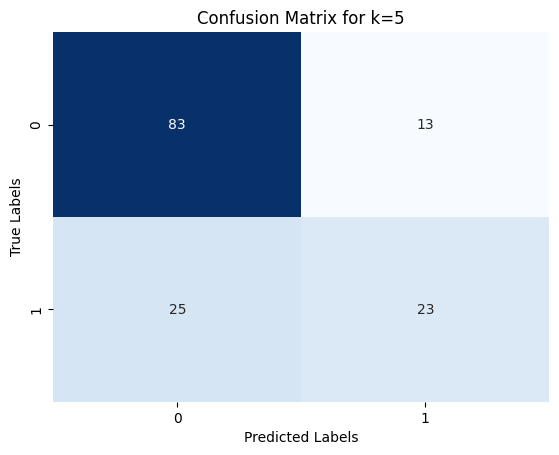

K=7
Accuracy for k=7: 0.7291666666666666
Precision for k=7: 0.6363636363636364
Recall for k=7: 0.4375
F1 Score for k=7: 0.5185185185185185
Confusion Matrix for k=7:
[[84 12]
 [27 21]]




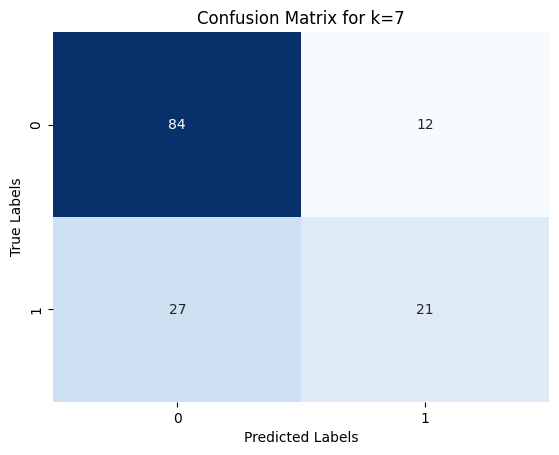

K=9
Accuracy for k=9: 0.75
Precision for k=9: 0.7
Recall for k=9: 0.4375
F1 Score for k=9: 0.5384615384615384
Confusion Matrix for k=9:
[[87  9]
 [27 21]]




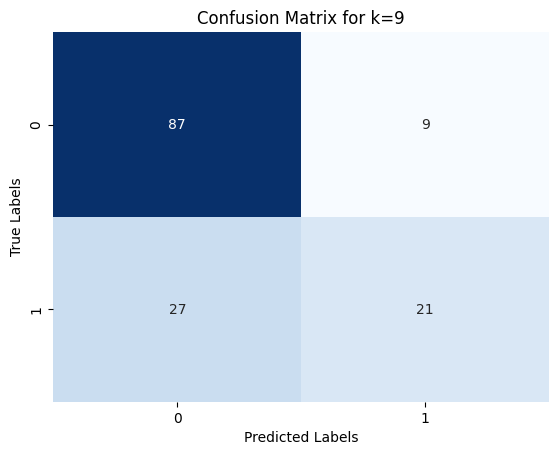

K=11
Accuracy for k=11: 0.7361111111111112
Precision for k=11: 0.6785714285714286
Recall for k=11: 0.3958333333333333
F1 Score for k=11: 0.5
Confusion Matrix for k=11:
[[87  9]
 [29 19]]




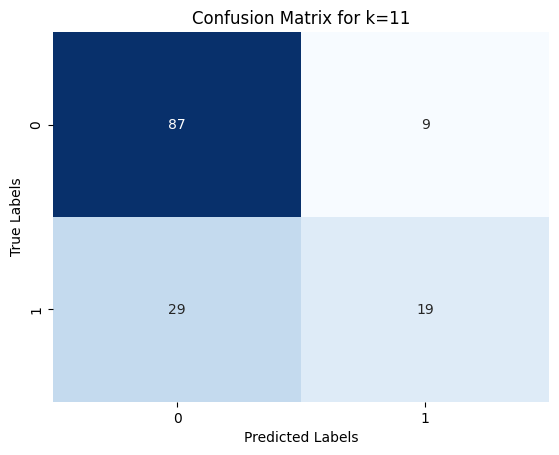

K=13
Accuracy for k=13: 0.7638888888888888
Precision for k=13: 0.7692307692307693
Recall for k=13: 0.4166666666666667
F1 Score for k=13: 0.5405405405405406
Confusion Matrix for k=13:
[[90  6]
 [28 20]]




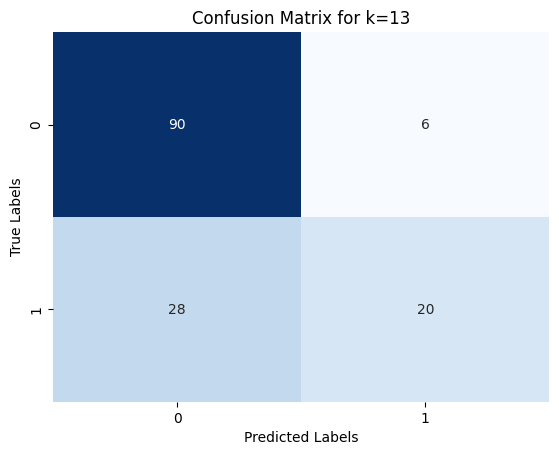

K=15
Accuracy for k=15: 0.7569444444444444
Precision for k=15: 0.7241379310344828
Recall for k=15: 0.4375
F1 Score for k=15: 0.5454545454545455
Confusion Matrix for k=15:
[[88  8]
 [27 21]]




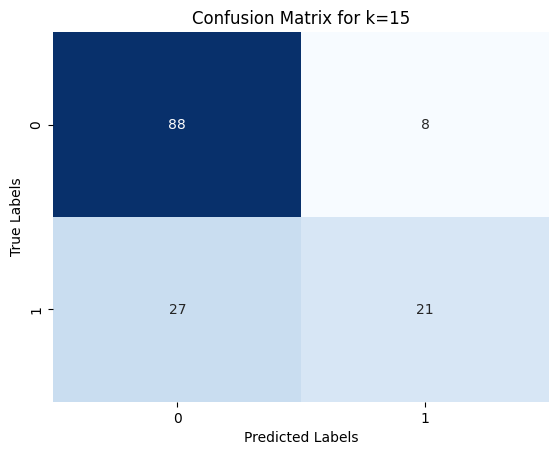

Scaled Features
K=3
Accuracy for k=3: 0.7777777777777778
Precision for k=3: 0.6739130434782609
Recall for k=3: 0.6458333333333334
F1 Score for k=3: 0.6595744680851064
Confusion Matrix for k=3:
[[81 15]
 [17 31]]




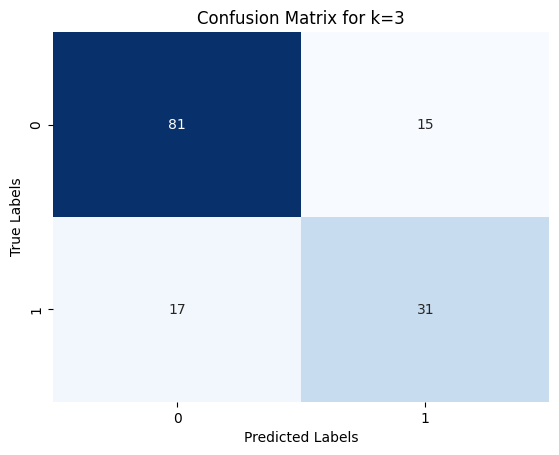

K=5
Accuracy for k=5: 0.7986111111111112
Precision for k=5: 0.7567567567567568
Recall for k=5: 0.5833333333333334
F1 Score for k=5: 0.6588235294117648
Confusion Matrix for k=5:
[[87  9]
 [20 28]]




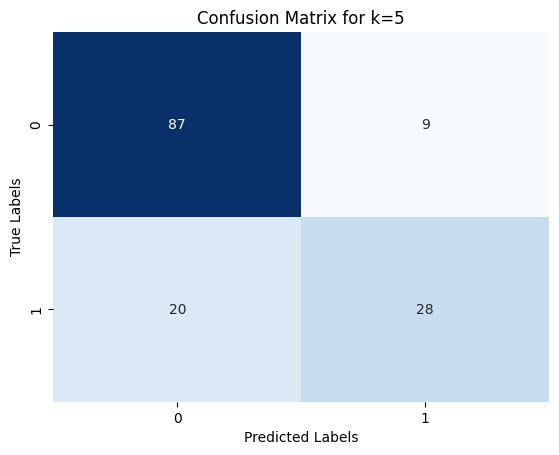

K=7
Accuracy for k=7: 0.7708333333333334
Precision for k=7: 0.7142857142857143
Recall for k=7: 0.5208333333333334
F1 Score for k=7: 0.6024096385542168
Confusion Matrix for k=7:
[[86 10]
 [23 25]]




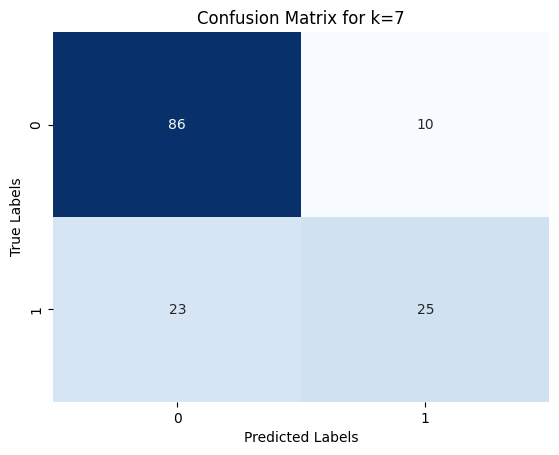

K=9
Accuracy for k=9: 0.8055555555555556
Precision for k=9: 0.8125
Recall for k=9: 0.5416666666666666
F1 Score for k=9: 0.65
Confusion Matrix for k=9:
[[90  6]
 [22 26]]




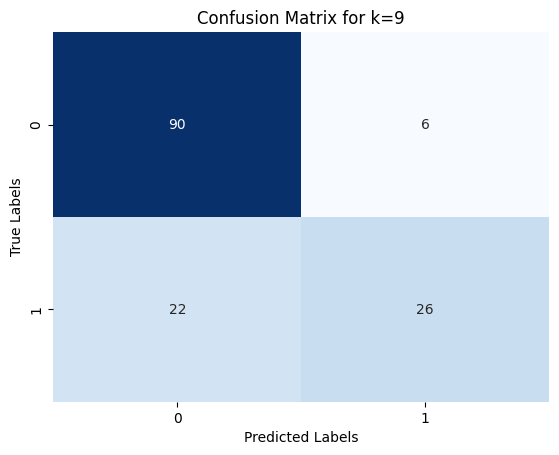

K=11
Accuracy for k=11: 0.7986111111111112
Precision for k=11: 0.7567567567567568
Recall for k=11: 0.5833333333333334
F1 Score for k=11: 0.6588235294117648
Confusion Matrix for k=11:
[[87  9]
 [20 28]]




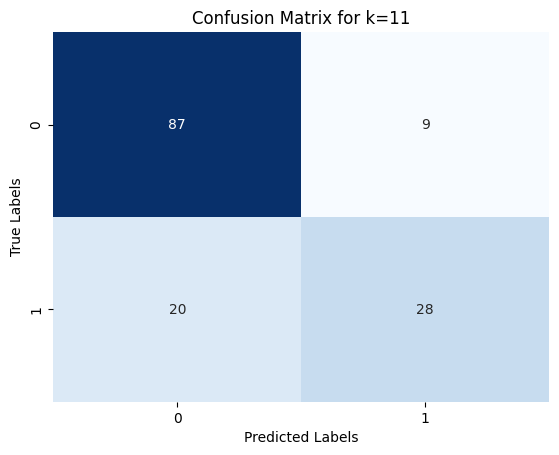

K=13
Accuracy for k=13: 0.7986111111111112
Precision for k=13: 0.7435897435897436
Recall for k=13: 0.6041666666666666
F1 Score for k=13: 0.6666666666666667
Confusion Matrix for k=13:
[[86 10]
 [19 29]]




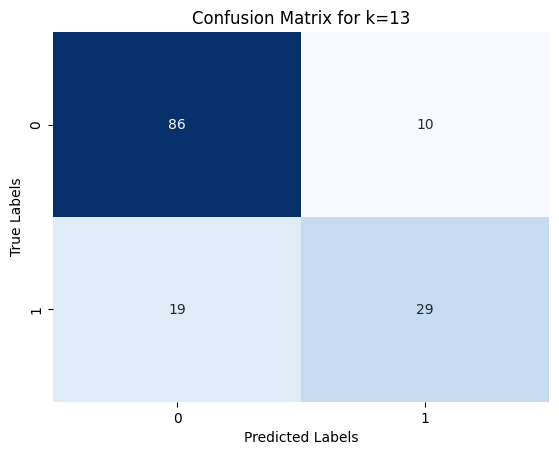

K=15
Accuracy for k=15: 0.7916666666666666
Precision for k=15: 0.7142857142857143
Recall for k=15: 0.625
F1 Score for k=15: 0.6666666666666666
Confusion Matrix for k=15:
[[84 12]
 [18 30]]




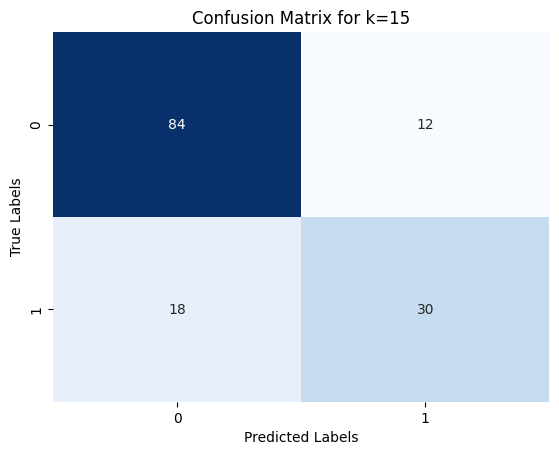

In [4]:

## K Nearest Neighbors
print("=" * 50)
print("K Nearest Neighbors")

k_values = [3, 5, 7, 9, 11, 13, 15]

print("Unscaled Features")

for k in k_values:
    print(f"K={k}")
    knn = KNeighborsClassifier(k)

    # Fit the model to the training set
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # Calculate metrics
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")

    # Precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision for k={k}: {precision}")

    # Recall 
    recall = recall_score(y_test, y_pred)
    print(f"Recall for k={k}: {recall}")

    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f"F1 Score for k={k}: {f1}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for k={k}:")
    print(conf_matrix)
    print("\n")

    # Plot heatmap for confusion matrix
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f"Confusion Matrix for k={k}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

print("Scaled Features")

for k in k_values:
    print(f"K={k}")
    knn = KNeighborsClassifier(k)

    # Fit the model to the training set
    knn.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = knn.predict(X_test_scaled)

    # Calculate metrics
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")

    # Precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision for k={k}: {precision}")

    # Recall 
    recall = recall_score(y_test, y_pred)
    print(f"Recall for k={k}: {recall}")

    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f"F1 Score for k={k}: {f1}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for k={k}:")
    print(conf_matrix)
    print("\n")

    # Plot heatmap for confusion matrix
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f"Confusion Matrix for k={k}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()